Sources for financial data - https://www.moneycontrol.com/, https://www.screener.in/

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns

In [30]:
df = pd.read_excel("Data for Companies.xlsx", sheet_name = "Data")

df.head()

,Company,Year,TotalAssets,TotalLiabilities,Current Assets,Current Liabilities,WorkingCapital,RetainedEarnings,EBIT,O/S Shares (MC),Price (Screener),MarketCap,Sales
0,India Cements Ltd,2021,11090,11090,1838,2579,-741,5350,549,309897800,162.45,5034.289761,4551
1,India Cements Ltd,2022,12043,12043,2541,2731,-190,5194,260,309897800,208.50,6461.369130,4883
2,India Cements Ltd,2023,11467,11467,3427,2827,600,5466,-360,309897800,185.05,5734.658789,5648
3,India Cements Ltd,2024,10701,10701,2787,2797,-10,5265,-122,309897800,212.40,6582.229272,5177
4,India Cements Ltd,2025,13830,13830,1710,1250,460,9884,-621,309897800,277.00,8584.169060,4357


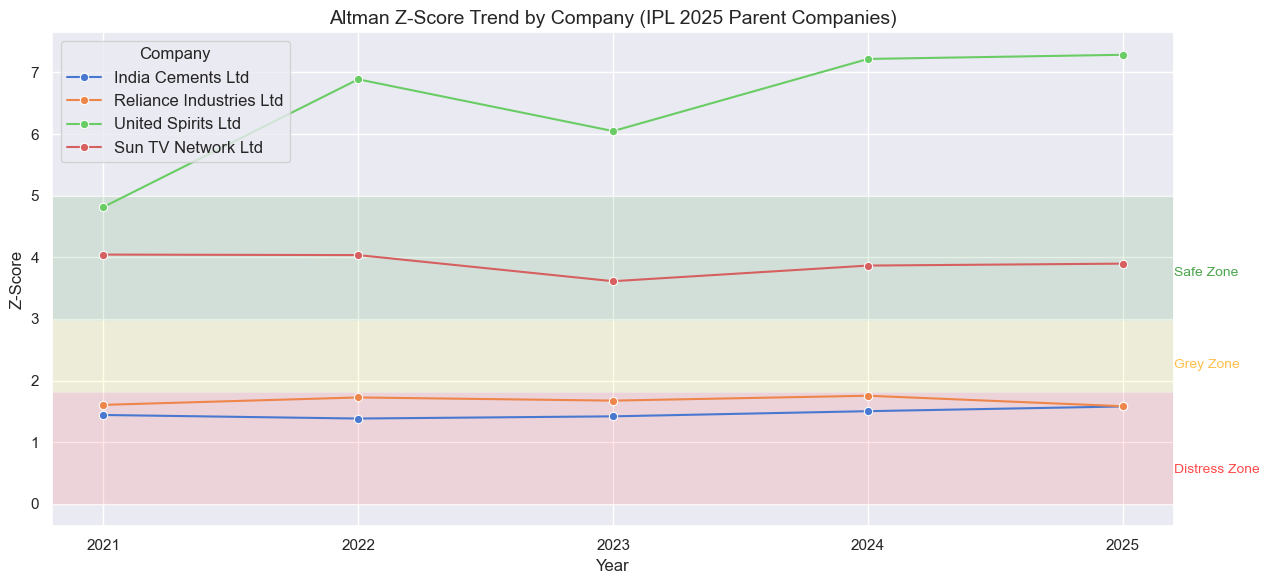

In [62]:
df['X1'] = df['WorkingCapital']/df['TotalAssets']
df['X2'] = df['RetainedEarnings']/df['TotalAssets']
df['X3'] = df['EBIT']/df['TotalAssets']
df['X4'] = df['MarketCap']/df['TotalLiabilities']
df['X5'] = df['Sales']/df['TotalAssets']


df['Z_Score'] = (
    1.2 * df['X1'] +
    1.4 * df['X2'] +
    3.3 * df['X3'] +
    0.6 * df['X4'] +
    1.0 * df['X5']
)


sns.set(style='darkgrid')

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Z_Score', hue='Company', marker = 'o', palette = 'muted')

plt.axhspan(0,1.81, facecolor='red',alpha = 0.1, label = None)
plt.axhspan(1.81, 2.99, facecolor='yellow',alpha = 0.1, label = None)
plt.axhspan(2.99,5, facecolor='green',alpha = 0.1, label = None)

plt.title("Altman Z-Score Trend by Company (IPL 2025 Parent Companies)", fontsize = 14)
plt.xlabel("Year")
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.ylabel("Z-Score")
plt.legend(title='Company', loc='best', fontsize = 12)
plt.tight_layout()
plt.text(df['Year'].max() + 0.2, 0.5, 'Distress Zone', color='red', alpha=0.7, fontsize=10)
plt.text(df['Year'].max() + 0.2, 2.2, 'Grey Zone', color='orange', alpha=0.7, fontsize=10)
plt.text(df['Year'].max() + 0.2, 3.7, 'Safe Zone', color='green', alpha=0.7, fontsize=10)
plt.savefig("Default Probability of IPL 2025 Parent Companies.png", dpi = 800, bbox_inches = 'tight')
plt.show()